# UFO Data Exploration

In [1]:
import pandas as pd
import PyPDF2
import os
import nltk


nltk.download( 'wordnet')
nltk.download( 'omw-1.4')

wiki_lst=[]
title=[]

totalPages = 0
totalFiles = 0
eliminatedFiles = 0

from nltk.corpus import wordnet

dict = { 'dict' }

for filename in os.listdir( './CIAUFOCD-FULL-CONVERTED' ):
    f = os.path.join('./CIAUFOCD-FULL-CONVERTED', filename )
    if os.path.isfile( f ):
        docString = ""
        # creating a pdf file object 
        pdfFileObj = open(f, 'rb') 
    
        # creating a pdf reader object 
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
    
        # printing number of pages in pdf file 
        pages = pdfReader.numPages;
        totalPages = totalPages + pages
        
        pageString = ""
        
        for c in range( pages ):
            # creating a page object 
            pageObj = pdfReader.getPage(c) 
            s = pageObj.extractText()
            split = s.split()
            for w in split:
                if len(w) > 2 & len(wordnet.synsets( w )) > 0:
                    docString+=w.lower() + " "
                    dict.add( w.lower() )
            
        # extracting text from page 
        if len(docString.split()) > 5:
            wiki_lst.append( docString )
            title.append( filename )
        
            totalFiles+=1
        else:
            eliminatedFiles += 1

        pdfFileObj.close() 

print( "Parsed " + str(totalPages) + " Total Pages" )
print( "Parsed " + str(totalFiles) + " Total Files" )


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/johnemyers/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/johnemyers/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Parsed 3493 Total Pages
Parsed 572 Total Files


In [2]:
#print( dict )
print( "Total Dictionary Size of " + str(len( dict )) )

Total Dictionary Size of 8201


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer()


#from sklearn.feature_extraction.text import HashingVectorizer
#vectorizer = HashingVectorizer()

X = vectorizer.fit_transform(wiki_lst)

In [4]:
#print(vectorizer.get_feature_names())
print(X.shape)

(572, 8190)


In [5]:
print(X[0,])

  (0, 1690)	0.06284652911453942
  (0, 5697)	0.06787170263232067
  (0, 2258)	0.06787170263232067
  (0, 1691)	0.06896719481755322
  (0, 1619)	0.06616602712018525
  (0, 6506)	0.055826655510487946
  (0, 2249)	0.10873366395960758
  (0, 4838)	0.11466765941787653
  (0, 3631)	0.0920066702370241
  (0, 6229)	0.10630416255658477
  (0, 1401)	0.060479063611710404
  (0, 7664)	0.043073044741354705
  (0, 7931)	0.08364317337573231
  (0, 3092)	0.09443617164004688
  (0, 2428)	0.05429803620364735
  (0, 5415)	0.12896515173743722
  (0, 1019)	0.12303115627916829
  (0, 3454)	0.08079355722093738
  (0, 8166)	0.074529523981477
  (0, 4649)	0.08289302084276877
  (0, 7423)	0.05154369468136477
  (0, 241)	0.04581212402005043
  (0, 3006)	0.09719051316232946
  (0, 7618)	0.09089142992077942
  (0, 6094)	0.030677482322973973
  :	:
  (0, 3969)	0.0931856723390232
  (0, 6988)	0.06717241799509156
  (0, 5017)	0.05393294842036628
  (0, 8048)	0.05791195715355048
  (0, 274)	0.16037133805406914
  (0, 5551)	0.08364317337573231
  (0

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

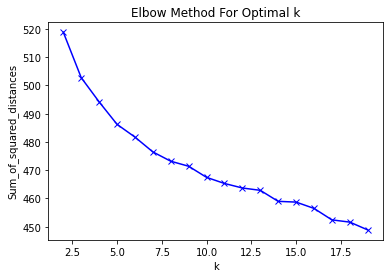

In [7]:
Sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [8]:
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

             title  cluster
376  C05515970.pdf        0
213  C05516119.pdf        0
402  C05515966.pdf        0
264  C05515945.pdf        0
268  C05516055.pdf        0
..             ...      ...
354  C05516677.pdf        7
355  C05517541.pdf        7
356  C05517555.pdf        7
143  C05517538.pdf        7
182  C05517539.pdf        7

[572 rows x 2 columns]


Cluster: 0
NumDocs: 16


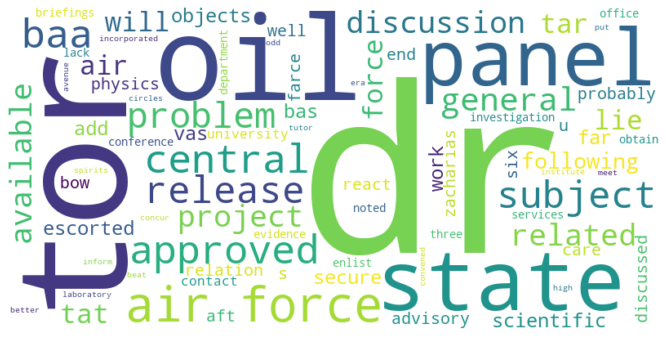

Cluster: 1
NumDocs: 129


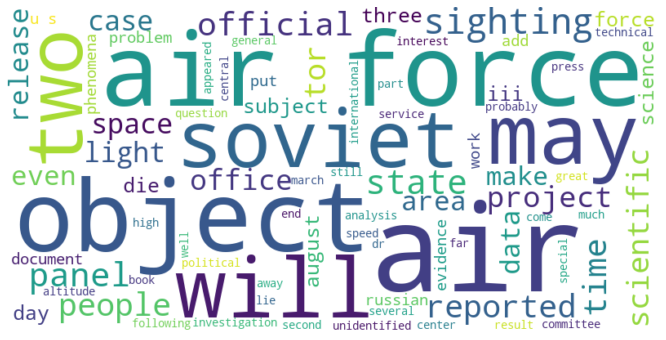

Cluster: 2
NumDocs: 26


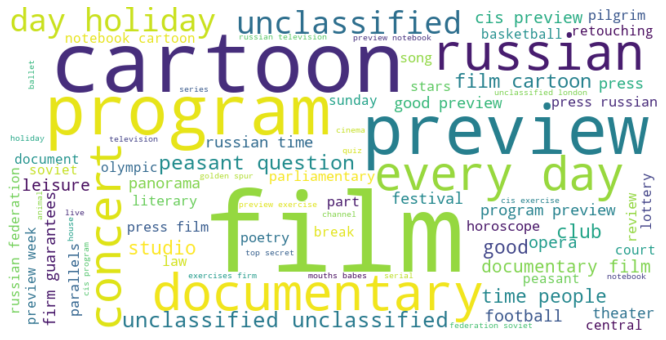

Cluster: 3
NumDocs: 47


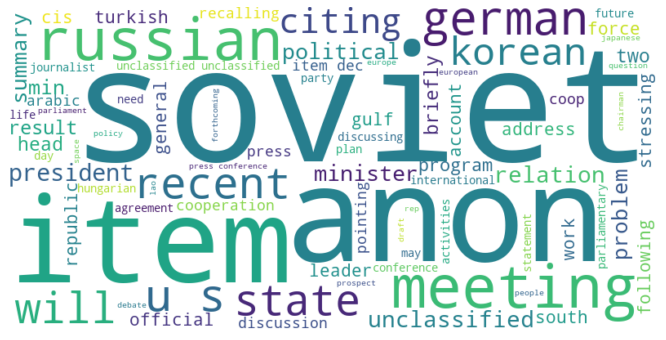

Cluster: 4
NumDocs: 49


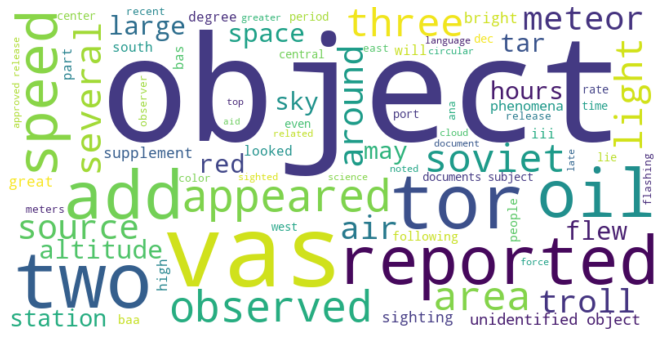

Cluster: 5
NumDocs: 57


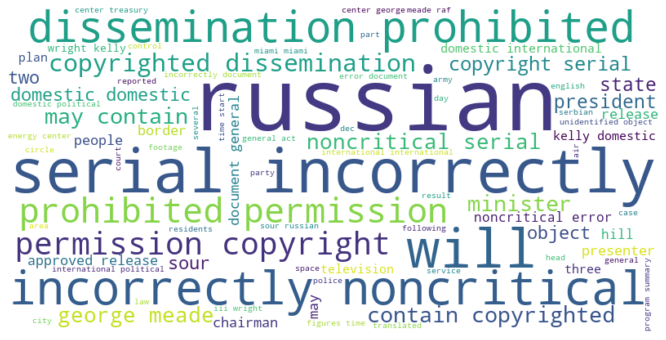

Cluster: 6
NumDocs: 166


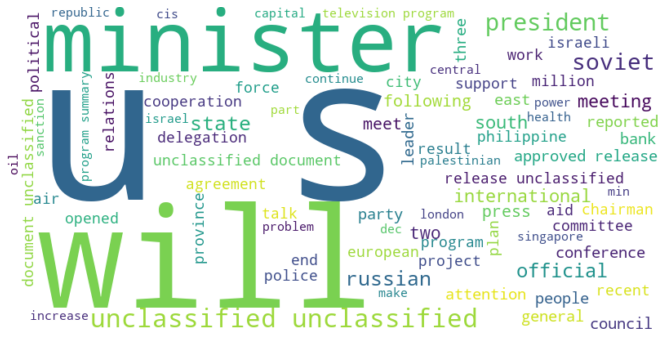

Cluster: 7
NumDocs: 82


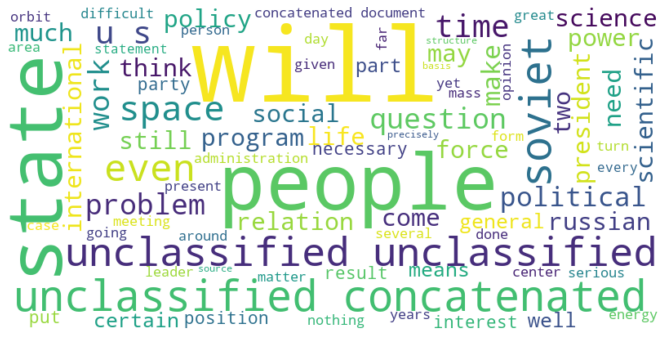

In [9]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(width=800, height=400, max_words=80, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print('NumDocs: {}'.format(len(titles)))
#    print(titles.to_string(index=False))
    plt.figure(figsize=(14,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()